In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from yolov4.tf import YOLOv4

%matplotlib inline
# tf.config.set_visible_devices([], 'GPU')

In [16]:
class_file = os.path.join('classes', 'coco.names')
weight_file = os.path.join('weights', 'yolov4.weights')

yolo = YOLOv4()
yolo.classes = class_file
yolo.make_model()
yolo.load_weights(weight_file, weights_type='yolo')

In [20]:
i = 0
class_labels = {}
with open(class_file) as f:
    for line in f:
        class_labels[i] = line.rstrip()
        i += 1
print(class_labels)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorbike', 4: 'aeroplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'sofa', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tvmonitor', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: '

In [53]:
test_img_dir = os.path.join('kitti_single', 'testing', 'image_2')

yolo.inference(os.path.join(test_img_dir, '001002.png'))



time: 106.74 ms
YOLOv4: Inference is finished


In [21]:
help(yolo.predict)

Help on method predict in module yolov4.tf:

predict(frame:numpy.ndarray) method of yolov4.tf.YOLOv4 instance
    Predict one frame
    
    @param frame: Dim(height, width, channels)
    
    @return pred_bboxes == Dim(-1, (x, y, w, h, class_id, probability))



In [56]:
img = cv2.imread(os.path.join(test_img_dir, '001002.png'))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = yolo.predict(img)
print(img.shape[:2])
print(results)

(375, 1242)
[[0.12832893 0.78744284 0.25567418 0.48090294 2.         0.97724813]
 [0.26120019 0.6352685  0.0967598  0.29224167 2.         0.94122851]
 [0.30595848 0.56940877 0.06938125 0.23126956 2.         0.88831133]
 [0.54591888 0.53490535 0.13253857 0.15739406 2.         0.83135986]
 [0.37627506 0.51304193 0.02451645 0.07429568 2.         0.81067878]
 [0.35694605 0.5345356  0.03351041 0.10458408 2.         0.78285366]
 [0.49512357 0.51385309 0.06408909 0.11062752 2.         0.75759315]
 [0.9381808  0.85114388 0.12341375 0.42769936 2.         0.72240853]
 [0.39876726 0.50628299 0.01701898 0.05340421 2.         0.40148842]
 [0.4556134  0.49355287 0.0430261  0.07509747 2.         0.39209247]
 [0.44326407 0.49204988 0.02524759 0.06549176 2.         0.35452974]]


In [57]:
threshold = 0.5
img_height = img.shape[0]
img_width = img.shape[1]
for (i, result) in enumerate(results):
    if result[5] > threshold:
        center_x = result[0] * img_width
        center_y = result[1] * img_height
        w = result[2] * img_width
        h = result[3] * img_height
        ul = (int(center_x - w/2), int(center_y - h/2))
        lr = (int(center_x + w/2), int(center_y + h/2))
        cv2.rectangle(img, ul, lr, (0, 255, 0), 2)
        label_position = (int(center_x), int(center_y - h/2 - 10))
        cv2.putText(img, class_labels[int(result[4])], label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imshow("Object Detection YOLOv4", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Help on method predict in module yolov4.tf:

predict(frame:numpy.ndarray) method of yolov4.tf.YOLOv4 instance
    Predict one frame
    
    @param frame: Dim(height, width, channels)
    
    @return pred_bboxes == Dim(-1, (x, y, w, h, class_id, probability))



In [2]:
def load_images_from_folder(folder, image_size=(250, 250)):
    images = []
    for filename in os.listdir(folder):
        loaded_img = load_img(os.path.join(folder,filename), target_size=image_size)
        numpy_img = img_to_array(loaded_img)
        images.append((os.path.splitext(filename)[0], numpy_img))
    return images

In [3]:
def create_mask(mask_path, img_shape):
    mask = np.zeros(shape=(img_shape[0], img_shape[1], 1))
    
    with open(mask_path) as f:
        lines = f.readlines()
    content = [line.split() for line in lines]
    for item in content:
        if item[0] == 'Car' or item[0] == 'Truck' or item[0] == 'Van' or item[0] == 'Pedestrian':
            ul_col, ul_row = int(float(item[4])), int(float(item[5]))
            lr_col, lr_row = int(float(item[6])), int(float(item[7]))
            mask[ul_row:lr_row, ul_col:lr_col, 0] = 1
    return mask

In [4]:
def image_batch_generator(input_list, batch_size, resize_shape):
    while True:
        for img_path in input_list:
            img_data = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            img_data = cv2.resize(img_data, (resize_shape[1], resize_shape[0]))
            img_batch.append(img_data)
            
            if len(img_batch) >= batch_size:
                yield np.float32(np.stack((img_batch), 0) / 255.0)
                img_batch = []

In [5]:
def image_mask_batch_generator(input_df, batch_size, resize_shape):
    img_batch = []
    mask_batch = []
    input_list = input_df.values.tolist()
    while True:
        for img_path, mask_path in input_list:
            img_data = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            mask_data = create_mask(mask_path, img_data.shape)
            img_data = cv2.resize(img_data, (resize_shape[1], resize_shape[0]))
            mask_data = cv2.resize(mask_data, (resize_shape[1], resize_shape[0]))
            img_batch.append(img_data)
            mask_batch.append(mask_data)
            
            if len(mask_batch) >= batch_size:
                yield np.float32(np.stack((img_batch), 0) / 255.0), np.stack(np.float32(np.expand_dims(mask_batch, -1)), 0)
                img_batch = []
                mask_batch = []

In [6]:
train_img_dir = os.path.join('kitti_single', 'training', 'image_2')
train_label_dir = os.path.join('kitti_single', 'training', 'label_2')

images = [os.path.join(train_img_dir, filename) for filename in os.listdir(train_img_dir)]
masks = [os.path.join(train_label_dir, filename) for filename in os.listdir(train_label_dir)]
train_file_info_df = pd.DataFrame(np.column_stack([images, masks]), columns=['images', 'masks'])

In [7]:
train_file_info_df.head()

,images,masks
0,kitti_single\training\image_2\000000.png,kitti_single\training\label_2\000000.txt
1,kitti_single\training\image_2\000001.png,kitti_single\training\label_2\000001.txt
2,kitti_single\training\image_2\000002.png,kitti_single\training\label_2\000002.txt
3,kitti_single\training\image_2\000003.png,kitti_single\training\label_2\000003.txt
4,kitti_single\training\image_2\000004.png,kitti_single\training\label_2\000004.txt


In [8]:
train_file_info_df.tail()

,images,masks
7476,kitti_single\training\image_2\007476.png,kitti_single\training\label_2\007476.txt
7477,kitti_single\training\image_2\007477.png,kitti_single\training\label_2\007477.txt
7478,kitti_single\training\image_2\007478.png,kitti_single\training\label_2\007478.txt
7479,kitti_single\training\image_2\007479.png,kitti_single\training\label_2\007479.txt
7480,kitti_single\training\image_2\007480.png,kitti_single\training\label_2\007480.txt


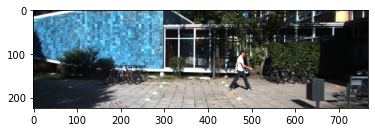

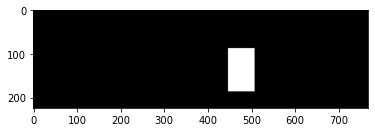

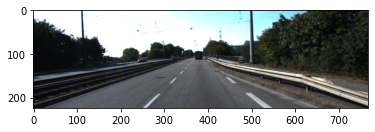

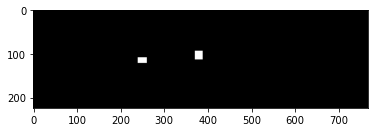

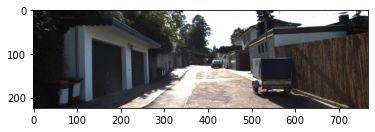

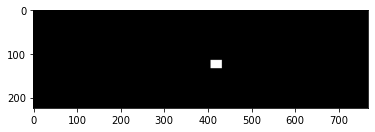

In [9]:
IMG_SHAPE = (224, 768)
BATCH_SIZE = 32
NUM_TEST_BATCHES = 3
UPSAMPLE_MODE = 'simple'
NET_SCALING = None

train_gen = image_mask_batch_generator(train_file_info_df, BATCH_SIZE, IMG_SHAPE)

img_batch, mask_batch = next(train_gen)
for i in range(3):
    im = np.array(255*img_batch[i],dtype=np.uint8)
    im_mask = np.array(mask_batch[i],dtype=np.uint8)
    
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.figure()
    plt.imshow(im_mask[:,:,0], cmap= 'gray')
    plt.show()

In [10]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

def calc_IOU(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    
    intersection = K.sum(y_true_f*y_pred_f)
    
    return (2*(intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
def calc_IOU_loss(y_true, y_pred):
    return -calc_IOU(y_true, y_pred)

def upsample_conv(filters, kernel_size, strides, padding):
    return layers.Conv2DTranspose(filters, kernel_size, strides=strides, padding=padding)

def upsample_simple(filters, kernel_size, strides, padding):
    return layers.UpSampling2D(strides)

if UPSAMPLE_MODE=='deconv':
    upsample=upsample_conv
else:
    upsample=upsample_simple

def create_unet():
    
    input_img = layers.Input((IMG_SHAPE[0], IMG_SHAPE[1], 3), name = 'RGB_Input')
    pp_in_layer = input_img
             
    c1 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(pp_in_layer)
    c1 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    c3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2)) (c3)
    
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2)) (c4)
    
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c5)
    
    
    u6 = upsample(64, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c6)
    
    u7 = upsample(32, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c7)
    
    u8 = upsample(16, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c8)
    
    u9 = upsample(8, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = layers.concatenate([u9, c1], axis=3)
    c9 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(c9)
    
    d = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
    if NET_SCALING is not None:
        d = layers.UpSampling2D(NET_SCALING)(d)
    
    seg_model = models.Model(inputs=[input_img], outputs=[d])
    seg_model.summary()
    
    return seg_model

In [11]:
adam = Adam(learning_rate=0.0001)

model = create_unet()
model.compile(optimizer=adam, loss=calc_IOU_loss, metrics=[calc_IOU])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
RGB_Input (InputLayer)          [(None, 224, 768, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 768, 8)  224         RGB_Input[0][0]                  
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 768, 8)  584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 112, 384, 8)  0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [12]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_file_info_df, test_size=0.25, random_state=42)
train_gen = image_mask_batch_generator(train_df, BATCH_SIZE, IMG_SHAPE)
val_gen = image_mask_batch_generator(val_df, BATCH_SIZE, IMG_SHAPE)

val_img, val_mask = [], []
for i in range(NUM_TEST_BATCHES):
    temp_img, temp_mask = next(val_gen)
    val_img.extend(temp_img)
    val_mask.extend(temp_mask)
val_img = np.array(val_img)
val_mask = np.array(val_mask)

loss_history = [model.fit(train_gen, steps_per_epoch=20, validation_data=(val_img, val_mask), epochs=120, workers=-1)]

  ...
    to  
  ['...']
Train for 20 steps, validate on 96 samples
Epoch 1/120
20/20 [==============================] - 12s 599ms/step - loss: -0.1627 - calc_IOU: 0.1627 - val_loss: -0.1721 - val_calc_IOU: 0.1721
Epoch 2/120
20/20 [==============================] - 10s 510ms/step - loss: -0.1707 - calc_IOU: 0.1707 - val_loss: -0.1956 - val_calc_IOU: 0.1956
Epoch 3/120
20/20 [==============================] - 10s 513ms/step - loss: -0.1995 - calc_IOU: 0.1995 - val_loss: -0.2256 - val_calc_IOU: 0.2256
Epoch 4/120
20/20 [==============================] - 10s 511ms/step - loss: -0.2247 - calc_IOU: 0.2247 - val_loss: -0.2333 - val_calc_IOU: 0.2333
Epoch 5/120
20/20 [==============================] - 10s 509ms/step - loss: -0.2257 - calc_IOU: 0.2257 - val_loss: -0.2547 - val_calc_IOU: 0.2547
Epoch 6/120
20/20 [==============================] - 10s 511ms/step - loss: -0.2810 - calc_IOU: 0.2810 - val_loss: -0.3609 - val_calc_IOU: 0.3609
Epoch 7/120
20/20 [==============================] - 10s

20/20 [==============================] - 8s 405ms/step - loss: -0.7804 - calc_IOU: 0.7804 - val_loss: -0.7390 - val_calc_IOU: 0.7390
Epoch 113/120
20/20 [==============================] - 8s 407ms/step - loss: -0.7679 - calc_IOU: 0.7679 - val_loss: -0.7729 - val_calc_IOU: 0.7729
Epoch 114/120
20/20 [==============================] - 8s 410ms/step - loss: -0.7638 - calc_IOU: 0.7638 - val_loss: -0.7746 - val_calc_IOU: 0.7746
Epoch 115/120
20/20 [==============================] - 8s 407ms/step - loss: -0.7437 - calc_IOU: 0.7437 - val_loss: -0.7695 - val_calc_IOU: 0.7695
Epoch 116/120
20/20 [==============================] - 8s 406ms/step - loss: -0.7548 - calc_IOU: 0.7548 - val_loss: -0.7787 - val_calc_IOU: 0.7787
Epoch 117/120
20/20 [==============================] - 8s 408ms/step - loss: -0.7572 - calc_IOU: 0.7572 - val_loss: -0.7738 - val_calc_IOU: 0.7738
Epoch 118/120
20/20 [==============================] - 9s 455ms/step - loss: -0.7463 - calc_IOU: 0.7463 - val_loss: -0.7771 - val_ca

In [13]:
test_img, test_mask = next(val_gen)

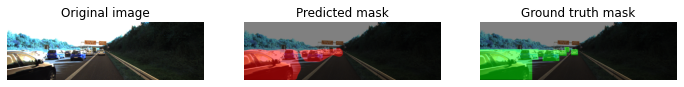

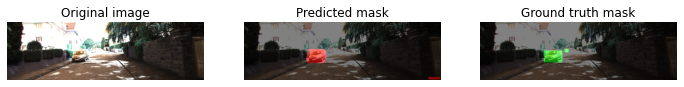

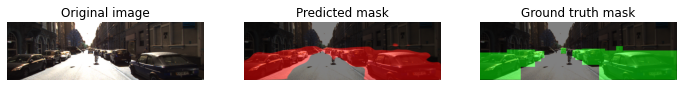

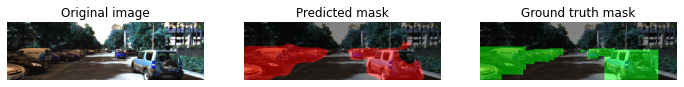

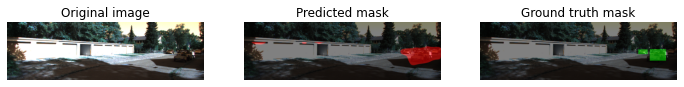

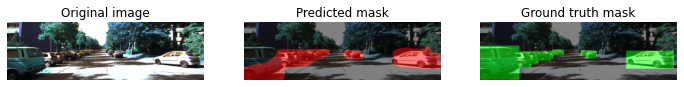

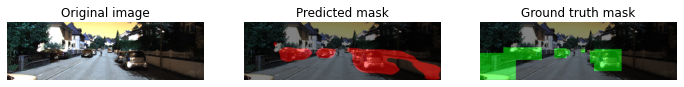

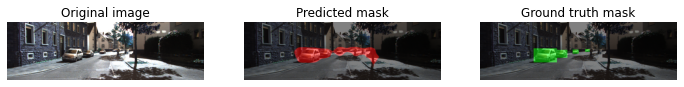

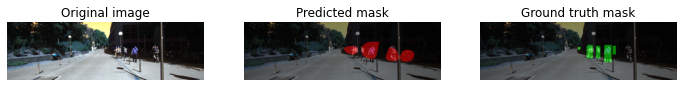

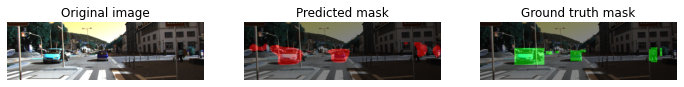

In [14]:
pred_all = model.predict(test_img)

for i in range(10,20):

    im = np.array(255*test_img[i],dtype=np.uint8)
    im_mask = np.array(255*test_mask[i],dtype=np.uint8)
    im_pred = np.array(255*pred_all[i],dtype=np.uint8)
    
    rgb_mask_pred = cv2.cvtColor(im_pred,cv2.COLOR_GRAY2RGB)
    rgb_mask_pred[:,:,1:3] = 0*rgb_mask_pred[:,:,1:3]
    rgb_mask_true = cv2.cvtColor(im_mask,cv2.COLOR_GRAY2RGB)
    rgb_mask_true[:,:,0] = 0*rgb_mask_true[:,:,0]
    rgb_mask_true[:,:,2] = 0*rgb_mask_true[:,:,2]

    img_pred = cv2.addWeighted(rgb_mask_pred,0.5,im,0.5,0)
    img_true = cv2.addWeighted(rgb_mask_true,0.5,im,0.5,0)

    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    plt.imshow(im)
    plt.title('Original image')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(img_pred)
    plt.title('Predicted mask')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(img_true)
    plt.title('Ground truth mask')
    plt.axis('off')
    plt.show()   

In [15]:
test_img_dir = os.path.join('kitti_single', 'testing', 'image_2')
images = [os.path.join(test_img_dir, filename) for filename in os.listdir(test_img_dir)]

test_gen = image_batch_generator(images, BATCH_SIZE, IMG_SHAPE)

